In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [241]:
# 한글 폰트 설정을 위한 코드 (이미 설정하셨다면 생략)
plt.rc('font', family='Malgun Gothic') # Windows
# plt.rc('font', family='AppleGothic') # Mac
plt.rcParams['axes.unicode_minus'] = False # 마이너스 폰트 깨짐 방지

In [242]:
df = pd.read_csv('C:/Users/sopi0/codes/korea-tour-recommender/data/2024_4차_전처리.csv')
df.head()

,아이디,국가별,성별,연령별,한국 방문횟수(카테고리),문1-1. 한국여행 관심 계기_1,문3-1. 고려한 관광활동_1,문3-2. 고려한 관광인프라_1,"문10. 1인 1일 지출경비(상하위 1% 대체, 61일 이상 결측)",문9-3. 총 체재기간_61일 이상 결측,숙박시설_그룹,여행동반자_그룹,방문 지역 수,주요 체재 지역,식비_비율,국내 교통비_비율,체험/활동비_비율,뷰티/의료비_비율,여행 서비스비_비율,숙박비_비율,쇼핑비_비율,기타 비용_비율
0,57,13,2,5,4,6,1.0,3,3,3.0,호텔,가족형,1,서울,0.260,0.064935,0.021645,0.0,0.004329,0.432900,0.216450,0.000000
1,58,3,2,4,4,6,9.0,6,2,2.0,호텔,가족형,1,서울,0.144,0.028705,0.004784,0.0,0.000096,0.239212,0.574108,0.009568
2,59,3,2,3,3,6,10.0,2,2,3.0,호텔,단체형,1,서울,0.239,0.054336,0.043469,0.0,0.000217,0.217344,0.434688,0.010867
3,60,1,1,2,1,7,9.0,2,2,3.0,호텔,혼자형,1,서울,0.288,0.134357,0.000000,0.0,0.001919,0.383877,0.191939,0.000000
4,61,3,2,2,4,2,1.0,4,2,2.0,호텔,가족형,2,서울,0.038,0.051269,0.000000,0.0,0.000256,0.128172,0.769034,0.012817


In [243]:
df.shape

(10183, 22)

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10183 entries, 0 to 10182
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   아이디                                    10183 non-null  int64  
 1   국가별                                    10183 non-null  int64  
 2   성별                                     10183 non-null  int64  
 3   연령별                                    10183 non-null  int64  
 4   한국 방문횟수(카테고리)                          10183 non-null  int64  
 5   문1-1. 한국여행 관심 계기_1                     10183 non-null  int64  
 6   문3-1. 고려한 관광활동_1                       10165 non-null  float64
 7   문3-2. 고려한 관광인프라_1                      10183 non-null  int64  
 8   문10. 1인 1일 지출경비(상하위 1% 대체, 61일 이상 결측)  10183 non-null  int64  
 9   문9-3. 총 체재기간_61일 이상 결측                 10156 non-null  float64
 10  숙박시설_그룹                                10183 non-null  object 
 11  여행

# '주요 체재 지역' 제거 후 '여행패턴' 변수 생성

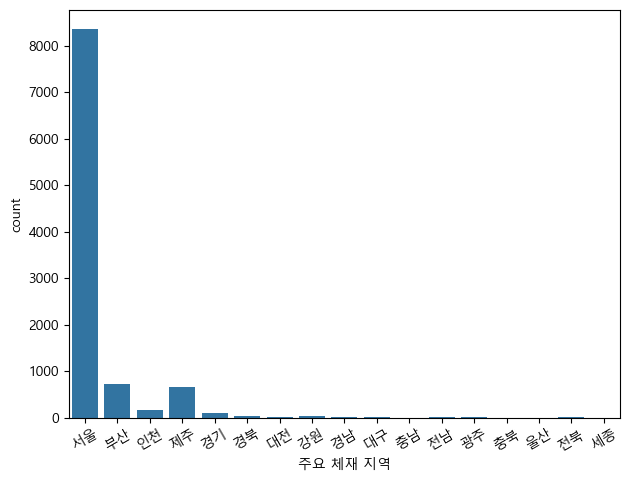

In [245]:
sns.countplot(data=df, x='주요 체재 지역')
plt.tight_layout()
plt.xticks(rotation=30)
plt.show()

In [246]:
raw = pd.read_csv("C:/Users/sopi0/codes/korea-tour-recommender/data/2024_만족도조사.csv", encoding='cp949')

In [247]:
cols = ['아이디', '문9-3. 총 체재기간']
raw = raw[cols]

In [248]:
df1 = pd.merge(left=df, right=raw, on='아이디', how='inner')

<Axes: xlabel='문9-3. 총 체재기간', ylabel='Count'>

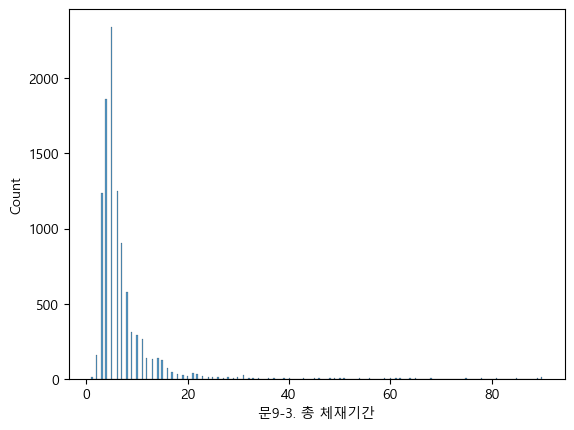

In [249]:
sns.histplot(data=df1, x='문9-3. 총 체재기간')

In [250]:
df1['문9-3. 총 체재기간'].describe()

count    10183.000000
mean         6.765688
std          5.883643
min          1.000000
25%          4.000000
50%          5.000000
75%          7.000000
max         90.000000
Name: 문9-3. 총 체재기간, dtype: float64

In [251]:
conditions = [(df1['주요 체재 지역']!='서울'), 
              (df1['주요 체재 지역']=='서울') & (df1['문9-3. 총 체재기간']<=5),
              (df1['주요 체재 지역']=='서울') & (df1['문9-3. 총 체재기간']>=6)]

choices = ['수도권/지방형(탐험가형)',
           '서울 단기형',
           '서울 심층형']

In [252]:
df1['여행 패턴'] = np.select(conditions, choices, default='기타')
df1.head()

,아이디,국가별,성별,연령별,한국 방문횟수(카테고리),문1-1. 한국여행 관심 계기_1,문3-1. 고려한 관광활동_1,문3-2. 고려한 관광인프라_1,"문10. 1인 1일 지출경비(상하위 1% 대체, 61일 이상 결측)",문9-3. 총 체재기간_61일 이상 결측,숙박시설_그룹,여행동반자_그룹,방문 지역 수,주요 체재 지역,식비_비율,국내 교통비_비율,체험/활동비_비율,뷰티/의료비_비율,여행 서비스비_비율,숙박비_비율,쇼핑비_비율,기타 비용_비율,문9-3. 총 체재기간,여행 패턴
0,57,13,2,5,4,6,1.0,3,3,3.0,호텔,가족형,1,서울,0.260,0.064935,0.021645,0.0,0.004329,0.432900,0.216450,0.000000,6,서울 심층형
1,58,3,2,4,4,6,9.0,6,2,2.0,호텔,가족형,1,서울,0.144,0.028705,0.004784,0.0,0.000096,0.239212,0.574108,0.009568,5,서울 단기형
2,59,3,2,3,3,6,10.0,2,2,3.0,호텔,단체형,1,서울,0.239,0.054336,0.043469,0.0,0.000217,0.217344,0.434688,0.010867,6,서울 심층형
3,60,1,1,2,1,7,9.0,2,2,3.0,호텔,혼자형,1,서울,0.288,0.134357,0.000000,0.0,0.001919,0.383877,0.191939,0.000000,6,서울 심층형
4,61,3,2,2,4,2,1.0,4,2,2.0,호텔,가족형,2,서울,0.038,0.051269,0.000000,0.0,0.000256,0.128172,0.769034,0.012817,5,서울 단기형


In [253]:
df1['여행 패턴'].unique()

array(['서울 심층형', '서울 단기형', '수도권/지방형(탐험가형)'], dtype=object)

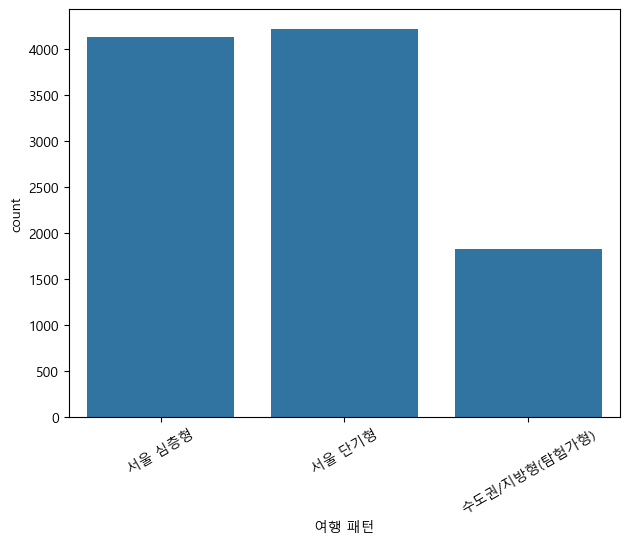

In [254]:
sns.countplot(data=df1, x='여행 패턴')
plt.tight_layout()
plt.xticks(rotation=30)
plt.show()

In [255]:
df['문9-3. 총 체재기간_61일 이상 결측'].unique()
#생각해보니까 우리가 범주형으로 바꿨었음. 그래서 raw데이터에서 다시 불러와서 처리함

array([ 3.,  2.,  4.,  1., nan])

In [256]:
df1.columns

Index(['아이디', '국가별', '성별', '연령별', '한국 방문횟수(카테고리)', '문1-1. 한국여행 관심 계기_1',
       '문3-1. 고려한 관광활동_1', '문3-2. 고려한 관광인프라_1',
       '문10. 1인 1일 지출경비(상하위 1% 대체, 61일 이상 결측)', '문9-3. 총 체재기간_61일 이상 결측',
       '숙박시설_그룹', '여행동반자_그룹', '방문 지역 수', '주요 체재 지역', '식비_비율', '국내 교통비_비율',
       '체험/활동비_비율', '뷰티/의료비_비율', '여행 서비스비_비율', '숙박비_비율', '쇼핑비_비율', '기타 비용_비율',
       '문9-3. 총 체재기간', '여행 패턴'],
      dtype='object')

아 그냥 국가별 빼기로 했었나?

In [257]:
drop_cols = ['국가별', '주요 체재 지역', '문9-3. 총 체재기간']

In [258]:
df1.shape

(10183, 24)

In [259]:
df1.drop(columns=drop_cols, inplace=True)
df1.shape

(10183, 21)

In [260]:
df1.columns

Index(['아이디', '성별', '연령별', '한국 방문횟수(카테고리)', '문1-1. 한국여행 관심 계기_1',
       '문3-1. 고려한 관광활동_1', '문3-2. 고려한 관광인프라_1',
       '문10. 1인 1일 지출경비(상하위 1% 대체, 61일 이상 결측)', '문9-3. 총 체재기간_61일 이상 결측',
       '숙박시설_그룹', '여행동반자_그룹', '방문 지역 수', '식비_비율', '국내 교통비_비율', '체험/활동비_비율',
       '뷰티/의료비_비율', '여행 서비스비_비율', '숙박비_비율', '쇼핑비_비율', '기타 비용_비율', '여행 패턴'],
      dtype='object')

# K-prototype 모델링

K-prototype은 결측치가 있으면 작동하지 않음!

In [261]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10183 entries, 0 to 10182
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   아이디                                    10183 non-null  int64  
 1   성별                                     10183 non-null  int64  
 2   연령별                                    10183 non-null  int64  
 3   한국 방문횟수(카테고리)                          10183 non-null  int64  
 4   문1-1. 한국여행 관심 계기_1                     10183 non-null  int64  
 5   문3-1. 고려한 관광활동_1                       10165 non-null  float64
 6   문3-2. 고려한 관광인프라_1                      10183 non-null  int64  
 7   문10. 1인 1일 지출경비(상하위 1% 대체, 61일 이상 결측)  10183 non-null  int64  
 8   문9-3. 총 체재기간_61일 이상 결측                 10156 non-null  float64
 9   숙박시설_그룹                                10183 non-null  object 
 10  여행동반자_그룹                               10183 non-null  object 
 11  방문

### '문3-1. 고려한 관광활동_1' 결측치 채우기

In [262]:
df1[df1['문3-1. 고려한 관광활동_1'].isna()]

,아이디,성별,연령별,한국 방문횟수(카테고리),문1-1. 한국여행 관심 계기_1,문3-1. 고려한 관광활동_1,문3-2. 고려한 관광인프라_1,"문10. 1인 1일 지출경비(상하위 1% 대체, 61일 이상 결측)",문9-3. 총 체재기간_61일 이상 결측,숙박시설_그룹,여행동반자_그룹,방문 지역 수,식비_비율,국내 교통비_비율,체험/활동비_비율,뷰티/의료비_비율,여행 서비스비_비율,숙박비_비율,쇼핑비_비율,기타 비용_비율,여행 패턴
1895,4027,2,5,3,2,NaN,3,2,4.0,호텔,가족형,3,0.140,0.177570,0.074766,0.046729,0.000000,0.467290,0.093458,0.000000,수도권/지방형(탐험가형)
2040,4283,1,4,4,3,NaN,6,2,2.0,친척 또는 친구 집,혼자형,1,0.880,0.031690,0.000000,0.000000,0.000000,0.000000,0.088028,0.000000,서울 단기형
2614,5363,2,2,4,2,NaN,3,4,3.0,친척 또는 친구 집,혼자형,1,0.000,0.000000,0.000000,0.191083,0.000000,0.000000,0.796178,0.012739,서울 심층형
2675,5479,2,5,1,6,NaN,8,3,2.0,호텔,친구형,1,0.000,0.000000,0.000000,0.000000,0.285714,0.000000,0.714286,0.000000,서울 단기형
2854,5768,1,6,4,8,NaN,6,3,2.0,호텔,가족형,1,0.000,0.000000,0.000000,0.000000,0.829187,0.000000,0.165837,0.004975,서울 단기형
3584,7032,1,6,2,8,NaN,8,2,4.0,호텔,가족형,2,0.182,0.090909,0.000000,0.000000,0.000000,0.649351,0.000000,0.077922,서울 심층형
4463,8602,2,2,1,8,NaN,5,1,4.0,호텔,혼자형,1,0.419,0.058725,0.000000,0.000000,0.000000,0.186242,0.335570,0.000000,서울 심층형
4964,9464,2,5,1,5,NaN,6,2,2.0,호텔,가족형,1,0.200,0.088889,0.000000,0.000000,0.000000,0.711111,0.000000,0.000000,서울 단기형
6210,11823,2,2,1,8,NaN,5,4,1.0,호텔,혼자형,1,0.200,0.400000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,서울 단기형
6641,12585,1,3,3,8,NaN,8,3,1.0,호텔,직장형,1,0.063,0.031579,0.000000,0.000000,0.000000,0.378947,0.526316,0.000000,서울 단기형


18명

In [263]:
raw = pd.read_csv('C:/Users/sopi0/codes/korea-tour-recommender/data/2024_만족도조사.csv', encoding='cp949')

In [264]:
raw.columns

Index(['Unnamed: 0', '아이디', '한국 방문횟수(평균)', '한국 방문횟수(카테고리)', '한국 방문횟수(재방문)',
       '여행 형태', '문1. 주요 방한 목적', '문1-1. 한국여행 관심 계기_1순위', '문1-1. 한국여행 관심 계기_2순위',
       '문1-1. 한국여행 관심 계기_3순위',
       ...
       '성별', '연령별', '방한목적별', '방한횟수별', '여행형태별', 'weight1', 'weight2', 'weight3',
       'weight4', '가중치'],
      dtype='object', length=403)

In [265]:
raw[raw['문3-1. 고려한 관광활동_1순위'].isna()]

,Unnamed: 0,아이디,한국 방문횟수(평균),한국 방문횟수(카테고리),한국 방문횟수(재방문),여행 형태,문1. 주요 방한 목적,문1-1. 한국여행 관심 계기_1순위,문1-1. 한국여행 관심 계기_2순위,문1-1. 한국여행 관심 계기_3순위,문2. 방문을 고려한 아시아 국가_1순위,문2. 방문을 고려한 아시아 국가_2순위,문2. 방문을 고려한 아시아 국가_3순위,문2. 방문을 고려한 아시아 국가 (없음),문2-1. 해당 국가 관심 계기_1순위,문2-1. 해당 국가 관심 계기_2순위,문2-1. 해당 국가 관심 계기_3순위,ZQ2_31,ZQ2_32,ZQ2_33,ZQ2_34,Q2_3a2at,Q2_3a2bt,Q2_3a2ct,Q2_3a2dt,Q2_3a2et,Q2_3a3at,Q2_3a3bt,Q2_3a3ct,Q2_3a3dt,Q2_3a3et,Q2_3b2a,Q2_3b2b,Q2_3b2c,Q2_3b2d,Q2_3b2e,Q2_3b3a,Q2_3b3b,Q2_3b3c,Q2_3b3d,Q2_3b3e,문3-1. 고려한 관광활동_1순위,문3-1. 고려한 관광활동_2순위,문3-1. 고려한 관광활동_3순위,문3-2. 고려한 관광인프라_1순위,문3-2. 고려한 관광인프라_2순위,문3-2. 고려한 관광인프라_3순위,문4. 여행 전 한국 관련 정보 수집 경로_1순위,문4. 여행 전 한국 관련 정보 수집 경로_2순위,문4. 여행 전 한국 관련 정보 수집 경로_3순위,문4. 여행 전 한국 관련 정보 수집 경로_없음,문4-1. 주로 이용한 사이트_1순위,문4-1. 주로 이용한 사이트_2순위,문4-1. 주로 이용한 사이트_3순위,문4-2. 부족했던 정보_1순위,문4-2. 부족했던 정보_2순위,문4-2. 부족했던 정보_3순위,문4-2. 부족했던 정보_없음,문5. 왕복 항공권 및 여행상품 예약 시기,문5-1. 개별 예약 항목_1,문5-1. 개별 예약 항목_2,문5-1. 개별 예약 항목_3,문5-1. 개별 예약 항목_4,문5-1. 개별 예약 항목_5,문5-1. 개별 예약 항목_6,문5-1. 개별 예약 항목_7,문5-1. 개별 예약 항목_8,문5-1. 개별 예약 항목_9,문5-1. 개별 예약 항목_10,Q5_1a_dk,Q6,Q6_1,Q6_1R,문7. 동반자 유무,문7. 여행 동반자(1. 혼자 방문),문7. 여행 동반자(2. 배우자/파트너),문7. 여행 동반자(3. 부모님),문7. 여행 동반자(4. 자녀),문7. 여행 동반자(5. 그 외 가족/친지),문7. 여행 동반자(6. 친구),문7. 여행 동반자(7. 직장 동료),문7. 여행 동반자(8. 기타),문7-1. 동반자 수(본인포함),문7-1. 동반자 수(본인제외),문7-1. 동반자 수(만 15세 미만),"문7-1. 동반자 수(본인포함, 만 15세 미만 제외)","문7-1. 동반자 수(본인제외, 만 15세 미만 제외)","문7-1. 동반자 수(본인포함, 카테고리)","문7-1. 동반자 수(본인제외, 카테고리)","문7-1. 동반자 수(만 15세 미만, 카테고리)","문7-1. 동반자 수(본인포함, 만 15세 미만 제외, 카테고리)","문7-1. 동반자 수(본인제외, 만 15세 미만 제외, 카테고리)",문8. 참여한 활동(1. 식도락 관광),문8. 참여한 활동(2. 쇼핑),문8. 참여한 활동(3. 자연경관 감상),문8. 참여한 활동(4. 고궁/역사 유적지 방문),문8. 참여한 활동(5. 전통문화체험),"문8. 참여한 활동(6. 박물관, 전시관 관람)","문8. 참여한 활동(7. K-POP, 한류스타 관련 공연장 및 드라마/영화 촬영지 방문)","문8. 참여한 활동(8. 연극, 뮤지컬, 발레 등 공연 관람)",문8. 참여한 활동(9. 지역 축제 참여),문8. 참여한 활동(10. 유흥),문8. 참여한 활동(11. 오락),문8. 참여한 활동(12. 뷰티/미용 관광),문8. 참여한 활동(13. 치료/건강검진),문8. 참여한 활동(14. 스포츠/레포츠 관람),문8. 참여한 활동(15. 스포츠/레포츠 참가),문8. 참여한 활동(16. 국제회의),문8. 참여한 활동(17. 비즈니스 전문활동),"문8. 참여한 활동(18. 연수, 교육, 연구)",문8. 참여한 활동(19. 기타),Q8a20,문8-1. 만족한 활동_1순위,문8-1. 만족한 활동_2순위,문8-1. 만족한 활동_3순위,문9-1. 가장 좋았던곳_1,문9-1. 가장 좋았던곳_2,문9-1. 가장 좋았던곳_3,문9-1. 가장 좋았던곳_4,문9-1. 가장 좋았던곳_5,문9-2. 방문지역(1. 서울),문9-2. 방문지역(2. 경기),문9-2. 방문지역(3. 인천),문9-2. 방문지역(4. 강원),문9-2. 방문지역(5. 대전),문9-2. 방문지역(6. 충북),문9-2. 방문지역(7. 충남),문9-2. 방문지역(8. 세종),문9-2. 방문지역(9. 경북),문9-2. 방문지역(10. 경남),문9-2. 방문지역(11. 대구),문9-2. 방문지역(12. 울산),문9-2. 방문지역(13. 부산),문9-2. 방문지역(14. 광주),문9-2. 방문지역(15. 전북),문9-2. 방문지역(16. 전남),문9-2. 방문지역(17. 제주),문9-2. 방문권역(1. 서울),문9-2. 방문권역(2. 경기도),문9-2. 방문권역(3. 인천),문9-2. 방문권역(4. 강원도),문9-2. 방문권역(5. 충청도),문9-2. 방문권역(6. 경상도),문9-2. 방문권역(7. 전라도),문9-2. 방문권역(8. 제주),문9-2. 수도권 및 지방 방문율(수도권 한정),문9-2. 수도권 및 지방 방문율(지방 한정),문9-2. 수도권 및 지방 방문율(수도권+지방 모두 방문),문9-2. 수도권 및 지방 방문율(수도권 방문),문9-2. 수도권 및 지방 방문율(지방 방문),문9-3. 총 숙박기간,문9-3. 총 체재기간,문9-3. 총 체재기간_61일 이상 결측,문9-3. 총 체재기간(카테고리),문9-4. 시도별 숙박기간_서울,문9-4. 시도별 숙박기간_경기,문9-4. 시도별 숙박기간_인천,문9-4. 시도별 숙박기간_강원,문9-4. 시도별 숙박기간_대전,문9-4. 시도별 숙박기간_충북,문9-4. 시도별 숙박기간_충남,문9-4. 시도별 숙박기간_세종,문9-4. 시도별 숙박기간_경북,문9-4. 시도별 숙박기간_경남,문9-4. 시도별 숙박기간_대구,문9-4. 시도별 숙박기간_울산,문9-4. 시도별 숙박기간_부산,문9-4. 시도별 숙박기간_광주,문9-4. 시도별 숙박기간_전북,문9-4. 시도별 숙박기간_전남,문9-4. 시도별 숙박기간_제주,문9-4. 시도별 체재기간_서울,문9-4. 시도별 체재기간_경기,문9-4. 시도별 체재기간_인천,문9-4. 시도별 체재기간_강원,문9-4. 시도별 체재기간_대전,문9-4. 시도별 체재기간_충북,문9-4. 시도별 체재기간_충남,문9-4. 시도별 체재기간_세종,문9-4. 시도별 체재기간_경북,문9-4. 시도별 체재기간_경남,문9-4. 시도별 체재기간_대구,문9-4. 시도별 체재기간_울산,문9-4. 시도별 체재기간_부산,문9-4. 시도별 체재기간_광주,문9-4. 시도별 체재기간_전북,문9-4. 시도별 체재기간_전남,문9-4. 시도별 체재기간_제주,문9-4. 시도별 숙박기간(60박 이상 결측)_서울,문9-4. 시도별 숙박기간(60박 이상 결측)_경기,문9-4. 시도별 숙박기간(60박 이상 결측)_인천,문9-4. 시도별 숙박기간(60박 이상 결측)_강원,문9-4. 시도별 숙박기간(60박 이상 결측)_대전,문9-4. 시도별 숙박기간(60박 이상 결측)_충북,문9-4. 시도별 숙박기간(60박 이상 결측)_충남,문9-4. 시도별 숙박기간(60박 이상 결측)_세종,문9-4. 시도별 숙박기간(60박 이상 결측)_경북,문9-4. 시도별 숙박기간(60박 이상 결측)_경남,문9-4. 시도별 숙박기간(60박 이상 결측)_대구,문9-4. 시도별 숙박기간(60박 이상 결측)_울산,문9-4. 시도별 숙박기간(60박 이상 결측)_부산,문9-4. 시도별 숙박기간(60박 이상 결측)_광주,문9-4. 시도별 숙박기간(60박 이상 결측)_전북,문9-4. 시도별 숙박기간(60박 이상 결측)_전남,문9-4. 시도별 숙박기간(60박 이상 결측)_제주,문9-4. 시도별 체재기간(61일 이상 결측)_서울,문9-4. 시도별 체재기간(61일 이상 결측)_경기,문9-4. 시

1순위가 결측치면 2, 3순위도 결측치인 듯

In [266]:
df2 = df1.dropna(subset='문3-1. 고려한 관광활동_1')
print(df1.shape)
print(df2.shape)

(10183, 21)
(10165, 21)


일단 제거하고 모델 돌림.

같이 이야기해보기

### '문9-3. 총 체재기간_61일 이상 결측' 결측치 채우기

In [267]:
df1[df1['문9-3. 총 체재기간_61일 이상 결측'].isna()]

,아이디,성별,연령별,한국 방문횟수(카테고리),문1-1. 한국여행 관심 계기_1,문3-1. 고려한 관광활동_1,문3-2. 고려한 관광인프라_1,"문10. 1인 1일 지출경비(상하위 1% 대체, 61일 이상 결측)",문9-3. 총 체재기간_61일 이상 결측,숙박시설_그룹,여행동반자_그룹,방문 지역 수,식비_비율,국내 교통비_비율,체험/활동비_비율,뷰티/의료비_비율,여행 서비스비_비율,숙박비_비율,쇼핑비_비율,기타 비용_비율,여행 패턴
108,274,2,3,4,2,10.0,6,4,NaN,기타,혼자형,2,0.402,0.060241,0.010040,0.000000,0.000000,0.461847,0.040161,0.026104,서울 심층형
178,422,1,2,1,7,6.0,1,4,NaN,기타,가족형,5,0.246,0.122807,0.021053,0.000000,0.000000,0.526316,0.035088,0.049123,서울 심층형
567,1261,2,2,1,6,11.0,3,4,NaN,기타,혼자형,1,0.414,0.034483,0.160920,0.000000,0.000000,0.344828,0.045977,0.000000,서울 심층형
643,1392,1,3,2,2,3.0,6,4,NaN,기타,혼자형,1,0.185,0.046154,0.000000,0.000000,0.000000,0.615385,0.153846,0.000000,서울 심층형
863,1886,1,2,1,1,8.0,6,4,NaN,친척 또는 친구 집,혼자형,1,0.413,0.035813,0.000000,0.000000,0.000000,0.275482,0.275482,0.000000,서울 심층형
874,1921,2,3,4,7,4.0,2,4,NaN,호텔,친구형,1,0.165,0.082645,0.055096,0.000000,0.000000,0.550964,0.137741,0.008264,서울 심층형
1644,3517,1,2,1,1,6.0,3,4,NaN,기타,혼자형,1,0.335,0.047847,0.000000,0.000000,0.000000,0.478469,0.095694,0.043062,서울 심층형
2812,5707,2,2,4,4,9.0,6,4,NaN,친척 또는 친구 집,혼자형,1,0.417,0.031250,0.000000,0.000000,0.000000,0.000000,0.520833,0.031250,서울 심층형
3830,7454,1,2,1,7,10.0,6,4,NaN,게스트하우스/호스텔,친구형,4,0.199,0.099715,0.028490,0.085470,0.000000,0.284900,0.284900,0.017094,서울 심층형
4576,8801,2,3,4,4,3.0,6,4,NaN,친척 또는 친구 집,혼자형,3,0.408,0.027778,0.024510,0.049020,0.000000,0.000000,0.490196,0.000000,서울 심층형


27명

<Axes: xlabel='문9-3. 총 체재기간_61일 이상 결측', ylabel='count'>

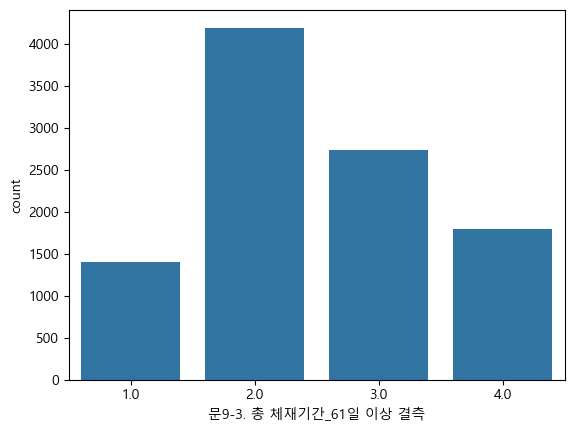

In [268]:
sns.countplot(x='문9-3. 총 체재기간_61일 이상 결측',data=df2)

In [269]:
df2.shape

(10165, 21)

총 체재기간 61일 이상인 경우인가본데 우선 제거하고 모델 실행시킴.

근데 여행 패턴이 '탐험가형'인 경우도 섞여있는걸보면 의미 있는 데이터일지도..?

같이 이야기해보기

4 범위에 넣기


In [270]:
df2['문9-3. 총 체재기간_61일 이상 결측'] = df2['문9-3. 총 체재기간_61일 이상 결측'].fillna(4.0)

C:\Users\sopi0\AppData\Local\Temp\ipykernel_27592\3396577548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['문9-3. 총 체재기간_61일 이상 결측'] = df2['문9-3. 총 체재기간_61일 이상 결측'].fillna(4.0)


In [271]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10165 entries, 0 to 10182
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   아이디                                    10165 non-null  int64  
 1   성별                                     10165 non-null  int64  
 2   연령별                                    10165 non-null  int64  
 3   한국 방문횟수(카테고리)                          10165 non-null  int64  
 4   문1-1. 한국여행 관심 계기_1                     10165 non-null  int64  
 5   문3-1. 고려한 관광활동_1                       10165 non-null  float64
 6   문3-2. 고려한 관광인프라_1                      10165 non-null  int64  
 7   문10. 1인 1일 지출경비(상하위 1% 대체, 61일 이상 결측)  10165 non-null  int64  
 8   문9-3. 총 체재기간_61일 이상 결측                 10165 non-null  float64
 9   숙박시설_그룹                                10165 non-null  object 
 10  여행동반자_그룹                               10165 non-null  object 
 11  방문 지역 수

### '식비_비율' 결측치

In [272]:
df2[df2['식비_비율'].isna()]

,아이디,성별,연령별,한국 방문횟수(카테고리),문1-1. 한국여행 관심 계기_1,문3-1. 고려한 관광활동_1,문3-2. 고려한 관광인프라_1,"문10. 1인 1일 지출경비(상하위 1% 대체, 61일 이상 결측)",문9-3. 총 체재기간_61일 이상 결측,숙박시설_그룹,여행동반자_그룹,방문 지역 수,식비_비율,국내 교통비_비율,체험/활동비_비율,뷰티/의료비_비율,여행 서비스비_비율,숙박비_비율,쇼핑비_비율,기타 비용_비율,여행 패턴
7291,13758,1,5,4,2,9.0,6,1,3.0,친척 또는 친구 집,혼자형,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,수도권/지방형(탐험가형)


In [273]:
df2[df2['식비_비율']==1.0]

,아이디,성별,연령별,한국 방문횟수(카테고리),문1-1. 한국여행 관심 계기_1,문3-1. 고려한 관광활동_1,문3-2. 고려한 관광인프라_1,"문10. 1인 1일 지출경비(상하위 1% 대체, 61일 이상 결측)",문9-3. 총 체재기간_61일 이상 결측,숙박시설_그룹,여행동반자_그룹,방문 지역 수,식비_비율,국내 교통비_비율,체험/활동비_비율,뷰티/의료비_비율,여행 서비스비_비율,숙박비_비율,쇼핑비_비율,기타 비용_비율,여행 패턴
4530,8710,2,3,1,4,1.0,2,1,2.0,호텔,복합형(가족+친구),1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,서울 단기형
8828,16639,2,3,2,4,1.0,4,1,2.0,호텔,가족형,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,서울 단기형
8829,16641,1,2,1,4,2.0,4,1,2.0,호텔,가족형,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,서울 단기형


<Axes: xlabel='여행 패턴', ylabel='count'>

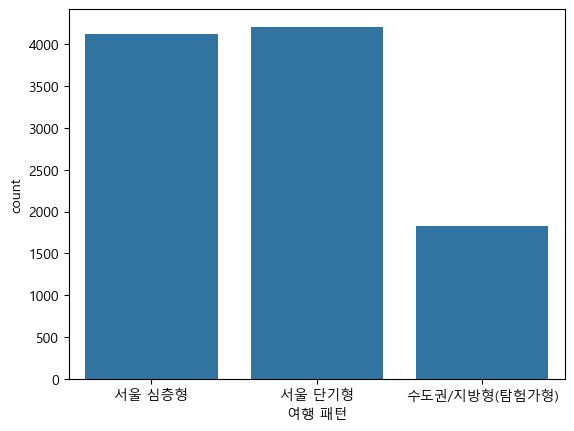

In [274]:
sns.countplot(x='여행 패턴', data=df2)

엥 나머지 비율 다 0인거면 식비_비율 100인가봄

친척 또는 친구 집에서 머문거라 가능할지도

그냥 제거

In [275]:
df2 = df2.dropna(subset='식비_비율')

In [276]:
df2.shape

(10164, 21)

In [238]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10137 entries, 0 to 10182
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   아이디                                    10137 non-null  int64  
 1   성별                                     10137 non-null  int64  
 2   연령별                                    10137 non-null  int64  
 3   한국 방문횟수(카테고리)                          10137 non-null  int64  
 4   문1-1. 한국여행 관심 계기_1                     10137 non-null  int64  
 5   문3-1. 고려한 관광활동_1                       10137 non-null  float64
 6   문3-2. 고려한 관광인프라_1                      10137 non-null  int64  
 7   문10. 1인 1일 지출경비(상하위 1% 대체, 61일 이상 결측)  10137 non-null  int64  
 8   문9-3. 총 체재기간_61일 이상 결측                 10137 non-null  float64
 9   숙박시설_그룹                                10137 non-null  object 
 10  여행동반자_그룹                               10137 non-null  object 
 11  방문 지역 수

In [278]:
df2.to_csv('C:/Users/sopi0/codes/korea-tour-recommender/data/2024_5차_전처리.csv', index=False)

## 데이터 전처리

In [279]:
data = pd.read_csv('C:/Users/sopi0/codes/korea-tour-recommender/data/2024_5차_전처리.csv')

In [280]:
data.shape

(10164, 21)

In [113]:
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import silhouette_score

In [114]:
features = ['성별', '연령별', '한국 방문횟수(카테고리)', '문1-1. 한국여행 관심 계기_1',
       '문3-1. 고려한 관광활동_1', '문3-2. 고려한 관광인프라_1',
       '문10. 1인 1일 지출경비(상하위 1% 대체, 61일 이상 결측)', '문9-3. 총 체재기간_61일 이상 결측',
       '숙박시설_그룹', '여행동반자_그룹', '방문 지역 수', '식비_비율', '국내 교통비_비율', '체험/활동비_비율',
       '뷰티/의료비_비율', '여행 서비스비_비율', '숙박비_비율', '쇼핑비_비율', '기타 비용_비율', '여행 패턴'] # '아이디'를 제외한 모든 변수

df_model = df2[features].copy()

In [115]:
len(features)

20

In [116]:
# 2. 수치형 데이터 스케일링 (표준화) => 순위형 범주형 변수도 포함해봄.
scaler = StandardScaler()
num_cols = ['연령별', '한국 방문횟수(카테고리)', '문10. 1인 1일 지출경비(상하위 1% 대체, 61일 이상 결측)',
            '문9-3. 총 체재기간_61일 이상 결측', '방문 지역 수','식비_비율', '국내 교통비_비율', 
            '체험/활동비_비율', '뷰티/의료비_비율', '여행 서비스비_비율', 
            '숙박비_비율', '쇼핑비_비율', '기타 비용_비율']
df_model[num_cols] = scaler.fit_transform(df_model[num_cols])

In [117]:
len(num_cols)

13

In [118]:
# 3. 범주형 변수의 인덱스 추출 (K-prototype 입력용)
# 모델은 어떤 컬럼이 범주형인지 인덱스 번호로 인식합니다.
cat_cols = ['성별', '문1-1. 한국여행 관심 계기_1','문3-1. 고려한 관광활동_1', 
            '문3-2. 고려한 관광인프라_1','숙박시설_그룹', '여행동반자_그룹','여행 패턴']
df_model[cat_cols] = df_model[cat_cols].astype('object')

cat_idx = [df_model.columns.get_loc(col) for col in cat_cols]

In [119]:
# 4. 데이터를 Numpy Array로 변환 (kmodes 라이브러리 요구사항)
matrix = df_model.values

## 실루엣 계수

In [281]:
# --- 1. 실루엣 계산을 위한 데이터 준비 ---
# 실루엣 점수 계산 함수는 범주형 변수를 숫자로 인식해야 하므로 임시 변환이 필요합니다.
df_silhouette = df_model.copy()
le = LabelEncoder()

for col in cat_cols:
    df_silhouette[col] = le.fit_transform(df_silhouette[col])

In [282]:
# --- 2. K값 변화에 따른 실루엣 점수 계산 ---
sil_scores = []
n_clusters = range(2, 16) # 2개에서 6개 사이 탐색

for k in n_clusters:
    # 모델 학습
    kproto = KPrototypes(n_clusters=k, init='Cao', random_state=42, n_jobs=-1)
    clusters = kproto.fit_predict(matrix, categorical=cat_idx)
    
    # 실루엣 점수 계산 (여기서는 변환된 df_silhouette를 사용)
    # 주의: K-prototype의 내부 거리 로직과 100% 일치하지는 않지만, 군집의 품질을 판단하는 좋은 지표가 됩니다.
    score = silhouette_score(df_silhouette, clusters)
    sil_scores.append(score)
    print(f"Cluster k={k}, Silhouette Score: {score:.4f}")

Cluster k=2, Silhouette Score: 0.0602
Cluster k=3, Silhouette Score: 0.0406
Cluster k=4, Silhouette Score: 0.0436
Cluster k=5, Silhouette Score: 0.0465
Cluster k=6, Silhouette Score: 0.0445
Cluster k=7, Silhouette Score: 0.0458
Cluster k=8, Silhouette Score: 0.0456
Cluster k=9, Silhouette Score: 0.0445
Cluster k=10, Silhouette Score: 0.0237
Cluster k=11, Silhouette Score: 0.0364
Cluster k=12, Silhouette Score: 0.0220
Cluster k=13, Silhouette Score: 0.0223
Cluster k=14, Silhouette Score: 0.0133
Cluster k=15, Silhouette Score: 0.0141


아... 처참한데...?

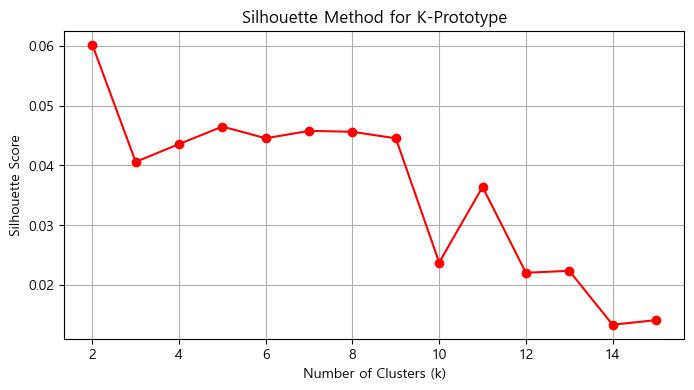

In [283]:
# --- 3. 실루엣 그래프 시각화 ---
plt.figure(figsize=(8, 4))
plt.plot(n_clusters, sil_scores, 'ro-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for K-Prototype')
plt.grid(True)
plt.show()

In [285]:
# # 최적의 K를 5라고 가정했을 때
# chosen_k = 9
# kproto = KPrototypes(n_clusters=chosen_k, init='Cao', verbose=1, random_state=42)
# clusters = kproto.fit_predict(matrix, categorical=cat_idx)

# 원본 데이터에 클러스터 결과 붙이기
data['Cluster'] = clusters

# 클러스터별 중심점(Centroids) 확인
print(kproto.cluster_centroids_)

ValueError: Length of values (10138) does not match length of index (10164)